<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/Joins1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
country=pd.read_csv('/content/countries.csv')

In [107]:
country.head()

,Unnamed: 0,id,name
0,0,1,Belgium
1,1,1729,England
2,2,4769,France
3,3,7809,Germany
4,4,10257,Italy


In [108]:
league=pd.read_csv('/content/leagues.csv')

In [109]:
league.head()
league.drop(columns=['id.1','name.1',],inplace=True)
league.head()

,Unnamed: 0,id,country_id,name
0,0,1,1,Belgium Jupiler League
1,1,1729,1729,England Premier League
2,2,4769,4769,France Ligue 1
3,3,7809,7809,Germany 1. Bundesliga
4,4,10257,10257,Italy Serie A


In [110]:
match=pd.read_csv('/content/matches.csv')

In [111]:
player=pd.read_csv('/content/player.csv')

In [112]:
player.head()

,Unnamed: 0,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [113]:
playerattributes=pd.read_csv('/content/player_attributes.csv')

In [114]:
playerattributes.head()

,Unnamed: 0,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [115]:
playerattributes.columns

Index(['Unnamed: 0', 'id', 'player_fifa_api_id', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [116]:
teamattributes=pd.read_csv('/content/team_attributes.csv')

In [117]:
teamattributes.columns

Index(['Unnamed: 0', 'id', 'team_fifa_api_id', 'team_api_id', 'date',
       'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [118]:
team=pd.read_csv('/content/teams.csv')

In [119]:
team.drop(columns='team_fifa_api_id',inplace=True)

In [120]:
team.head()

,Unnamed: 0,id,team_api_id,team_long_name,team_short_name
0,0,1,9987,KRC Genk,GEN
1,1,2,9993,Beerschot AC,BAC
2,2,3,10000,SV Zulte-Waregem,ZUL
3,3,4,9994,Sporting Lokeren,LOK
4,4,5,9984,KSV Cercle Brugge,CEB


In [121]:
leagues=pd.merge(left=country,right=league,how='right',on='id',suffixes=('', '_drop')).filter(regex='^(?!.*_drop)').drop(columns='id').dropna()

In [122]:
leagues.head()

,Unnamed: 0,name,country_id
0,0,Belgium,1
1,1,England,1729
2,2,France,4769
3,3,Germany,7809
4,4,Italy,10257


In [123]:
matchesnew=match.loc[:,['id','country_id','league_id','season','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]

In [124]:
matchesnew.head()

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,492473,9987,9993,1,1
1,2,1,1,2008/2009,492474,10000,9994,0,0
2,3,1,1,2008/2009,492475,9984,8635,0,3
3,4,1,1,2008/2009,492476,9991,9998,5,0
4,5,1,1,2008/2009,492477,7947,9985,1,3


In [125]:
countrymatch=pd.merge(left=leagues,right=matchesnew,how='left',left_on='country_id',right_on='country_id',suffixes=('_x','_y')).dropna()

In [126]:
len(countrymatch)

12633

In [127]:
countrymatch.isnull().sum()

Unnamed: 0          0
name                0
country_id          0
id                  0
league_id           0
season              0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
dtype: int64

## Q1)

In [128]:
countrymatch.head()

,Unnamed: 0,name,country_id,id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,0,Belgium,1,1.0,1.0,2008/2009,492473.0,9987.0,9993.0,1.0,1.0
1,0,Belgium,1,2.0,1.0,2008/2009,492474.0,10000.0,9994.0,0.0,0.0
2,0,Belgium,1,3.0,1.0,2008/2009,492475.0,9984.0,8635.0,0.0,3.0
3,0,Belgium,1,4.0,1.0,2008/2009,492476.0,9991.0,9998.0,5.0,0.0
4,0,Belgium,1,5.0,1.0,2008/2009,492477.0,7947.0,9985.0,1.0,3.0


In [129]:
countrymatch1=pd.merge(left=countrymatch,right=team,how='left',left_on='home_team_api_id',right_on='team_api_id').dropna()

In [130]:
countrymatch2=pd.merge(left=countrymatch,right=team,how='left',left_on='away_team_api_id',right_on='team_api_id').dropna()

In [131]:
countrymatch2.drop(columns=['id_x','id_y'],inplace=True)

In [132]:
countrymatch2.isnull().sum()

Unnamed: 0_x        0
name                0
country_id          0
league_id           0
season              0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
Unnamed: 0_y        0
team_api_id         0
team_long_name      0
team_short_name     0
dtype: int64

In [133]:
countrymatch2['Goals']=countrymatch2['home_team_goal'] +countrymatch2['away_team_goal']

In [134]:
countrymatch2.head()

,Unnamed: 0_x,name,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Unnamed: 0_y,team_api_id,team_long_name,team_short_name,Goals
0,0,Belgium,1,1.0,2008/2009,492473.0,9987.0,9993.0,1.0,1.0,1,9993,Beerschot AC,BAC,2.0
1,0,Belgium,1,1.0,2008/2009,492474.0,10000.0,9994.0,0.0,0.0,3,9994,Sporting Lokeren,LOK,0.0
2,0,Belgium,1,1.0,2008/2009,492475.0,9984.0,8635.0,0.0,3.0,5,8635,RSC Anderlecht,AND,3.0
3,0,Belgium,1,1.0,2008/2009,492476.0,9991.0,9998.0,5.0,0.0,7,9998,RAEC Mons,MON,5.0
4,0,Belgium,1,1.0,2008/2009,492477.0,7947.0,9985.0,1.0,3.0,9,9985,Standard de Liège,STL,4.0


In [135]:
countrymatch2=countrymatch2.loc[:,['name','season','Goals']]

In [136]:
countrymatch2['name'].unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy'], dtype=object)

Without reset index

In [137]:
goals=countrymatch2.groupby(['name','season'])['Goals'].sum()

In [138]:
goals.head()

name     season   
Belgium  2008/2009    855.0
         2009/2010    565.0
         2010/2011    635.0
         2011/2012    691.0
         2012/2013    703.0
Name: Goals, dtype: float64

In [139]:
goals=countrymatch2.groupby(['name','season'])['Goals'].sum().reset_index()

In [140]:
goals.head()

,name,season,Goals
0,Belgium,2008/2009,855.0
1,Belgium,2009/2010,565.0
2,Belgium,2010/2011,635.0
3,Belgium,2011/2012,691.0
4,Belgium,2012/2013,703.0


## Total goals over time for each country.

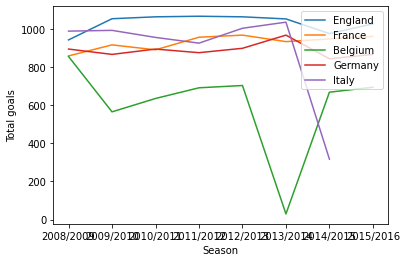

In [141]:
plt.plot(goals[goals['name'] == 'England']['season'], goals[goals['name'] == 'England']['Goals'], label = 'England')
plt.plot(goals[goals['name'] == 'France']['season'], goals[goals['name'] == 'France']['Goals'], label = 'France')
plt.plot(goals[goals['name'] == 'Belgium']['season'], goals[goals['name'] == 'Belgium']['Goals'], label = 'Belgium')
plt.plot(goals[goals['name'] == 'Germany']['season'], goals[goals['name'] == 'Germany']['Goals'], label = 'Germany')
plt.plot(goals[goals['name'] == 'Italy']['season'], goals[goals['name'] == 'Italy']['Goals'], label = 'Italy')
plt.xlabel('Season')
plt.ylabel('Total goals')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


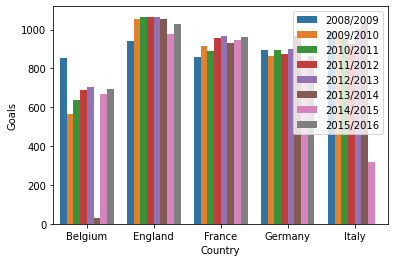

In [161]:
sns.barplot('name','Goals',data=goals,hue='season')
plt.xlabel('Country')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


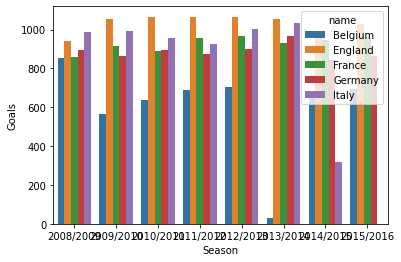

In [143]:
sns.barplot('season','Goals',data=goals,hue='name')
plt.xlabel('Season')
plt.show()

In [144]:
goalsavg=countrymatch2.groupby(['name','season'])['Goals'].mean().reset_index()

## Q2)

## Average goals over time for each country.

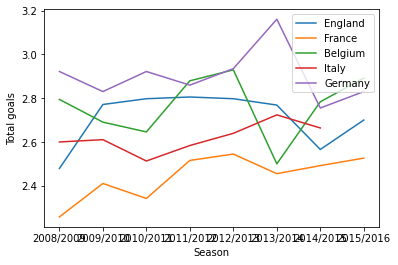

In [145]:
plt.plot(goalsavg[goalsavg['name'] == 'England']['season'], goalsavg[goalsavg['name'] == 'England']['Goals'], label = 'England')
plt.plot(goalsavg[goalsavg['name'] == 'France']['season'], goalsavg[goalsavg['name'] == 'France']['Goals'], label = 'France')
plt.plot(goalsavg[goalsavg['name'] == 'Belgium']['season'], goalsavg[goalsavg['name'] == 'Belgium']['Goals'], label = 'Belgium')
plt.plot(goalsavg[goalsavg['name'] == 'Italy']['season'], goalsavg[goalsavg['name'] == 'Italy']['Goals'], label = 'Italy')
plt.plot(goalsavg[goalsavg['name'] == 'Germany']['season'], goalsavg[goalsavg['name'] == 'Germany']['Goals'], label = 'Germany')
plt.xlabel('Season')
plt.ylabel('Total goals')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


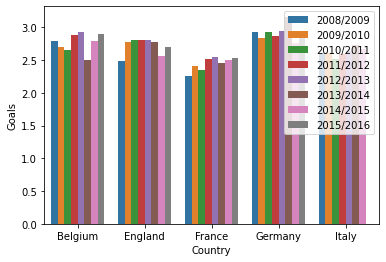

In [160]:
sns.barplot('name','Goals',data=goalsavg,hue='season')
plt.xlabel('Country')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


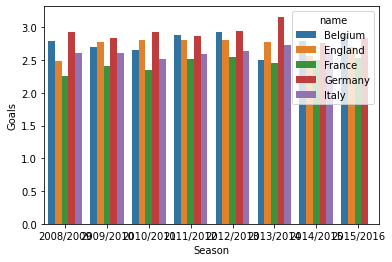

In [147]:
sns.barplot('season','Goals',data=goalsavg,hue='name')
plt.xlabel('Season')
plt.show()

In [148]:
playercombo=pd.merge(left=player,right=playerattributes,how='left',left_on=['player_fifa_api_id','player_api_id'],right_on=['player_fifa_api_id','player_api_id'],suffixes=('_x','_y')).dropna().drop(columns=['id_x','id_y','Unnamed: 0_x','Unnamed: 0_y'])

In [149]:
playercombo.isnull().sum()

player_api_id          0
player_name            0
player_fifa_api_id     0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0


##Q4)

## Top 5 players according to overall rating.

In [150]:
x=pd.DataFrame(playercombo.groupby('player_name')['overall_rating'].mean())

In [151]:
name=x.index.tolist()

In [152]:
x['Player name']=name

In [153]:
x.columns

Index(['overall_rating', 'Player name'], dtype='object')

In [154]:
x.sort_values('overall_rating',ascending=False,inplace= True)

In [155]:
xmax=x.head()

In [156]:
xmax['Player name'].tolist()

['Lionel Messi',
 'Cristiano Ronaldo',
 'Franck Ribery',
 'Andres Iniesta',
 'Zlatan Ibrahimovic']

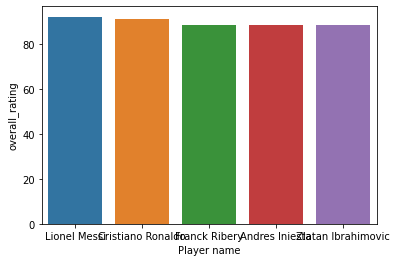

In [157]:
sns.barplot(x='Player name',y='overall_rating',data=xmax)

In [158]:
playernew=playercombo[playercombo['player_name'].isin(['Lionel Messi','Cristiano Ronaldo','Franck Ribery','Andres Iniesta','Zlatan Ibrahimovic'])]

## A few attributes of the top 5 players.

In [163]:
pd.pivot_table(data=playernew,index='player_name',aggfunc={'overall_rating':np.mean,'free_kick_accuracy':np.mean,'heading_accuracy':np.mean,'ball_control':np.mean})

,ball_control,free_kick_accuracy,heading_accuracy,overall_rating
player_name,,,,
Andres Iniesta,92.960000,69.280000,55.320000,88.320000
Cristiano Ronaldo,93.960000,81.640000,85.520000,91.280000
Franck Ribery,91.458333,81.750000,48.541667,88.458333
Lionel Messi,95.769231,84.115385,69.269231,92.192308
Zlatan Ibrahimovic,91.238095,81.380952,79.714286,88.285714
